<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%209/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. 




> 1. 1 Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut. 




In [807]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [808]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np



> 2. 2 Membaca Gambar



In [809]:
img_morph = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)
img_j = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)
img_finger = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

> 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan *Structuring Element* Dilasi (SED) berbentuk **cross 3 x 3** tanpa menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png) 


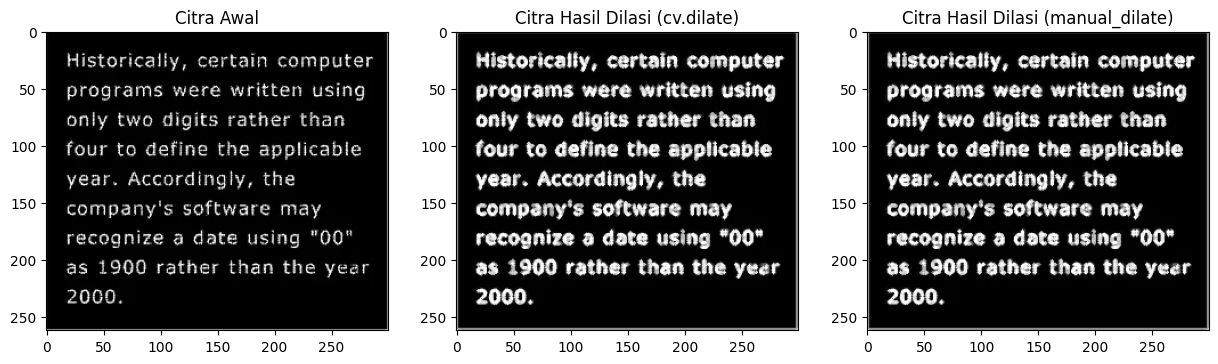

Hasil fungsi yang dibuat sama dengan fungsi dari library.


In [810]:
def manual_dilate(img, kernel, iterations):
    # Mendefinisikan dimensi gambar dan kernel
    img_rows, img_cols = img.shape
    kernel_rows, kernel_cols = kernel.shape

    # Mendefinisikan output gambar dengan nilai nol
    output = np.zeros(img.shape, dtype=np.uint8)

    # Padding gambar dengan nol pada tepiannya
    pad_height = int((kernel_rows - 1) / 2)
    pad_width = int((kernel_cols - 1) / 2)
    padded_image = np.zeros((img_rows + (2 * pad_height), img_cols + (2 * pad_width)), dtype=np.uint8)
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = img

    # Dilasi gambar dengan kernel dan iterasi
    for it in range(iterations):
        for row in range(img_rows):
            for col in range(img_cols):
                # Dilasi piksel
                dilation = 0
                for i in range(kernel_rows):
                    for j in range(kernel_cols):
                        if kernel[i, j] == 1:
                            if padded_image[row + i, col + j] > dilation:
                                dilation = padded_image[row + i, col + j]
                output[row, col] = dilation

        # Update padded_image dengan output terakhir
        padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = output

    return output

# Membuat kernel
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)

# Menggunakan fungsi yang dibuat untuk menghasilkan citra dilasi
dilation1 = manual_dilate(img_morph, kernel, iterations=1)

# Menggunakan fungsi dari library untuk menghasilkan citra dilasi
dilation2 = cv.dilate(img_morph, kernel, iterations=1)

# Menampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img_morph, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation2, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi (cv.dilate)')
axs[2].imshow(dilation1, cmap='gray')
axs[2].set_title('Citra Hasil Dilasi (manual_dilate)')
plt.show()

# Membandingkan hasil dari kedua fungsi
if np.array_equal(dilation1, dilation2):
    print("Hasil fungsi yang dibuat sama dengan fungsi dari library.")
else:
    print("Hasil fungsi yang dibuat berbeda dengan fungsi dari library.")

> 4. Buatlah program implementasi operasi dilasi *Structuring Element* Dilasi (SED) berbentuk **cross 3 x 3 dengan** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar 
morphology.png, dan cetak *Structuring Element*-nya)

Kernel: 
[[0 1 0]
 [1 1 1]
 [0 1 0]]


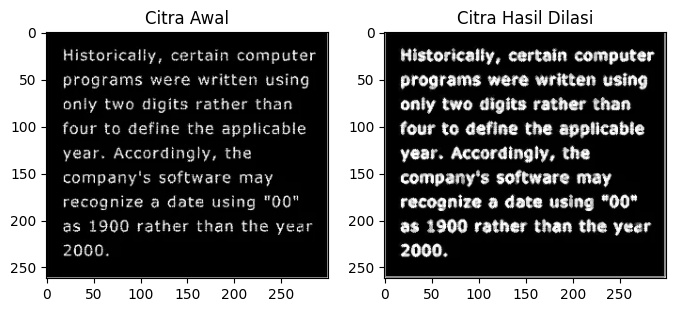

In [811]:
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)
dilation = cv.dilate(img_morph, kernel, iterations=1)

# mencetak kernel
print("Kernel: ")
print(kernel)

# menampilkan gambar awal dan hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs[0].imshow(img_morph, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi')
plt.show()

> 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan *Structuring Element* Erosi (SE) berbentuk square 5 x 5 **tanpa** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

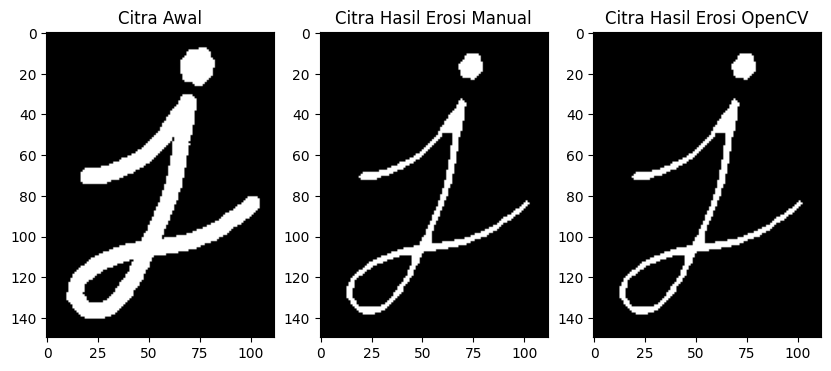

Hasil fungsi yang dibuat sama dengan fungsi dari library.


In [812]:
def manual_erosion(img, kernel, iterations=1):
    # Mengambil ukuran kernel
    kernel_height, kernel_width = kernel.shape

    # Mengambil ukuran gambar
    img_height, img_width = img.shape

    # Menghitung jumlah padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Membuat padding pada gambar
    padded_img = np.zeros((img_height + pad_height*2, img_width + pad_width*2), dtype=np.uint8)
    padded_img[pad_height:padded_img.shape[0]-pad_height, pad_width:padded_img.shape[1]-pad_width] = img

    # Melakukan erosi pada gambar dengan iterasi
    for i in range(iterations):
        # Membuat temporary image
        temp_img = np.zeros((img_height + pad_height*2, img_width + pad_width*2), dtype=np.uint8)

        # Melakukan erosi pada setiap piksel pada gambar yang bukan bagian dari padding
        for h in range(pad_height, padded_img.shape[0]-pad_height):
            for w in range(pad_width, padded_img.shape[1]-pad_width):
                temp_img[h, w] = np.min(padded_img[h-pad_height:h+pad_height+1, w-pad_width:w+pad_width+1] * kernel)

        # Mengganti nilai padded_img dengan hasil erosi dari temporary image
        padded_img = temp_img

    # Mengambil hasil erosi pada gambar yang sudah dipadding
    erosion = padded_img[pad_height:padded_img.shape[0]-pad_height, pad_width:padded_img.shape[1]-pad_width]

    return erosion

# Menginisialisasi SE square 5 x 5
kernel = np.ones((5, 5), dtype=np.uint8)

# Melakukan erosi pada gambar dengan fungsi manual
erosion_manual = manual_erosion(img_j, kernel, iterations = 1)

# Melakukan erosi pada gambar dengan fungsi cv.erode dari library OpenCV
erosion_cv = cv.erode(img_j, kernel, iterations=1)

# Menampilkan gambar hasil erosi dari fungsi manual dan fungsi cv.erode
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_j, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erosion_manual, cmap='gray')
axs[1].set_title('Citra Hasil Erosi Manual')
axs[2].imshow(erosion_cv, cmap='gray')
axs[2].set_title('Citra Hasil Erosi OpenCV')
plt.show()

# Membandingkan hasil dari kedua fungsi
if np.array_equal(erosion_manual, erosion_cv):
    print("Hasil fungsi yang dibuat sama dengan fungsi dari library.")
else:
    print("Hasil fungsi yang dibuat berbeda dengan fungsi dari library.")

> 6. Buatlah program implementasi operasi dilasi *Structuring Element* Erosi (SE) berbentuk square 5 x 5 **dengan** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

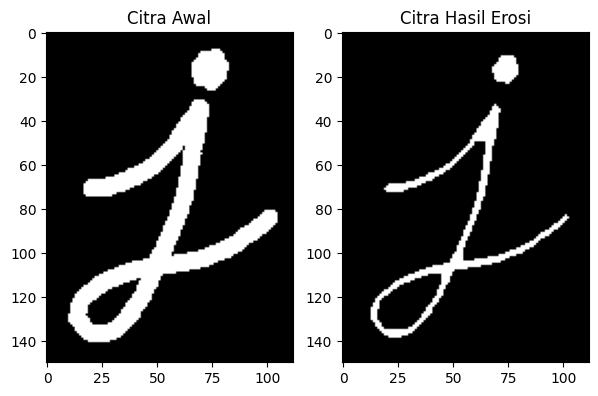

In [813]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img_j,kernel,iterations = 1)

# Menampilkan gambar awal dan hasil erosi
fig, axs = plt.subplots(1, 2, figsize=(7, 7))
axs[0].imshow(img_j, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erosion, cmap='gray')
axs[1].set_title('Citra Hasil Erosi')
plt.show()

> 7. Buatlah program implementasi operasi opening dengan *Structuring Element* 
berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png) 

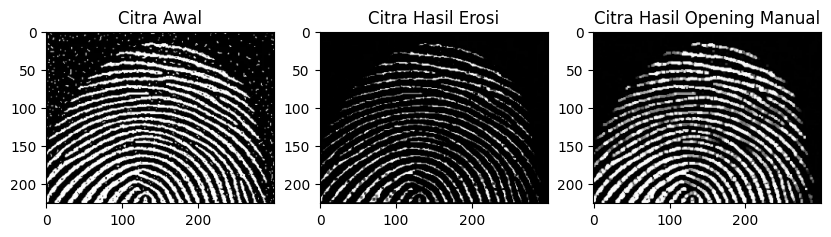

In [814]:
# def opening(img, kernel, iterations=1):
#     eroded = cv.erode(img, kernel, iterations=iterations)
#     opened = cv.dilate(eroded, kernel, iterations=iterations)
#     return opened

# Fungsi operasi opening dengan SE square 3 x 3

# def manual_opening(img, kernel, iterations=1):
#     # Melakukan erosi pada gambar
#     erosion = manual_erosion(img, kernel, iterations)

#     # Melakukan dilasi pada gambar yang sudah erosi
#     dilation = manual_dilate(erosion, kernel, iterations)
    
#     return dilation

# Menginisialisasi SE square 3 x 3
kernel = np.ones((3, 3), dtype=np.uint8)

erossion = manual_erosion(img_finger, kernel, iterations = 1)

# Melakukan opening pada gambar dengan fungsi manual
opening_manual = manual_dilate(erossion, kernel, iterations = 1)

# Menampilkan gambar hasil opening dari fungsi manual dan fungsi morphologyEx
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_finger, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erossion, cmap='gray')
axs[1].set_title('Citra Hasil Erosi')
axs[2].imshow(opening_manual, cmap='gray')
axs[2].set_title('Citra Hasil Opening Manual')
plt.show()

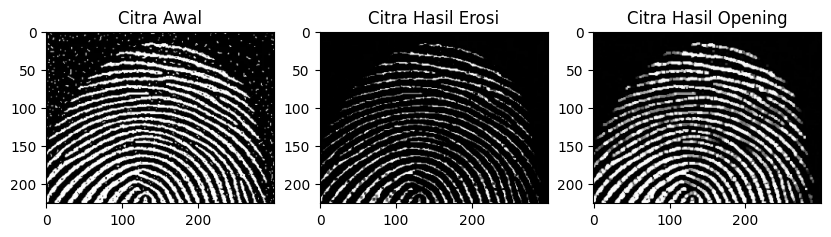

In [815]:
# Menginisialisasi SE square 3 x 3
kernel = np.ones((3, 3), dtype=np.uint8)

# Melakukan erosi pada citra dengan SE square 3 x 3
erosion = cv.erode(img_finger, kernel, iterations=1)

# Melakukan operasi opening pada citra hasil erosi dengan SE square 3 x 3
opening = cv.morphologyEx(img_finger, cv.MORPH_OPEN, kernel, iterations=1)

# Menampilkan gambar awal, hasil erosi, dan hasil opening
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_finger, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erosion, cmap='gray')
axs[1].set_title('Citra Hasil Erosi')
axs[2].imshow(opening, cmap='gray')
axs[2].set_title('Citra Hasil Opening')
plt.show()

> 8. Buatlah program implementasi operasi closing dengan *Structuring Element* berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library *morphology* dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png) 

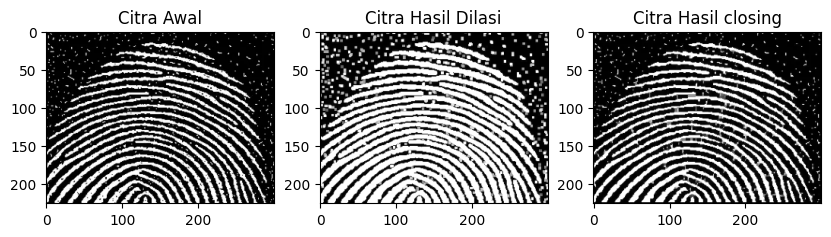

In [816]:
# def closing(img, kernel, iterations=1):
#     dilated = cv.dilate(img, kernel, iterations=iterations)
#     opened = cv.erode(dilated, kernel, iterations=iterations)
#     return opened

# def manual_closing(img, kernel, iterations=1):
#     # Melakukan dilasi pada gambar
#     dilation = manual_dilate(img, kernel, iterations)

#     # Melakukan erosi pada gambar yang sudah di dilasi
#     erosion = manual_erosion(dilation, kernel, iterations)
    
#     return erosion

# Menginisialisasi SE square 3 x 3
kernel = np.ones((3, 3), dtype=np.uint8)

dilation = manual_dilate(img_finger, kernel, iterations = 1)

# Melakukan closing pada gambar dengan fungsi manual
closing_manual = manual_erosion(dilation, kernel, iterations = 1)

# Menampilkan gambar hasil closing dari fungsi manual dan fungsi morphologyEx
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_finger, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi')
axs[2].imshow(closing_manual, cmap='gray')
axs[2].set_title('Citra Hasil closing')
plt.show()

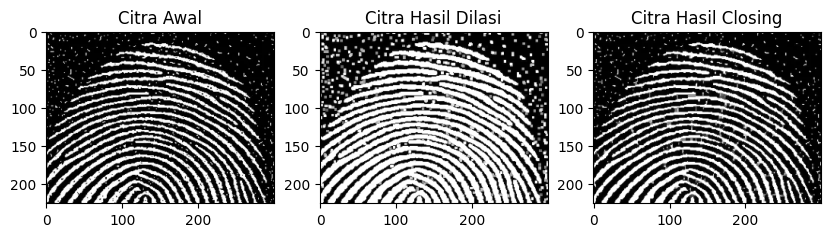

In [817]:
# Menginisialisasi SE square 3 x 3
kernel = np.ones((3, 3), dtype=np.uint8)

# Melakukan dilasi pada citra dengan SE square 3 x 3
dilation = cv.dilate(img_finger, kernel, iterations=1)

closing = cv.morphologyEx(img_finger, cv.MORPH_CLOSE, kernel, iterations=1)

# Menampilkan gambar awal, hasil erosi, dan hasil opening
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_finger, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi')
axs[2].imshow(closing, cmap='gray')
axs[2].set_title('Citra Hasil Closing')
plt.show()

> 9. Buatlah program implementasi operasi dilasi dengan *Structuring Element* berbentuk *Cross 3 x 3 dan 5 x 5*, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

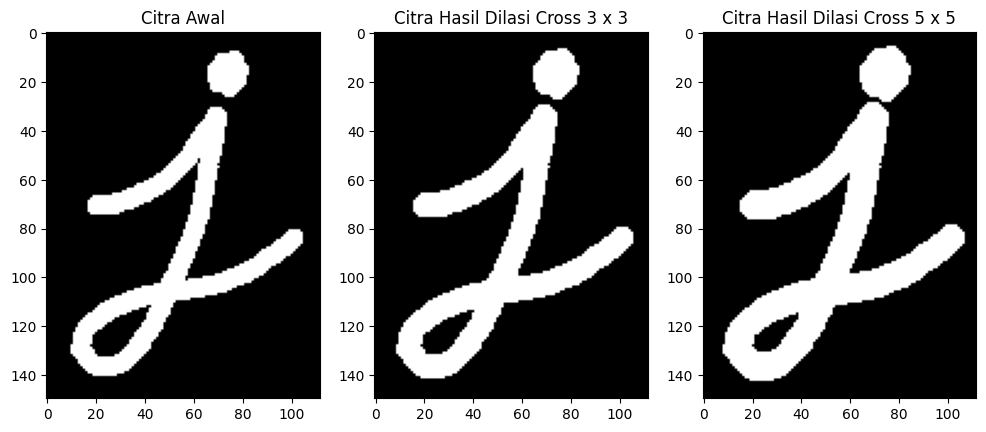

In [818]:
# Menginisialisasi SE cross 3 x 3
kernel_cross3 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

# Menginisialisasi SE cross 5 x 5
kernel_cross5 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

# Melakukan dilasi pada gambar dengan kernel cross 3 x 3
dilation_cross3 = cv.dilate(img_j, kernel_cross3)

# Melakukan dilasi pada gambar dengan kernel cross 5 x 5
dilation_cross5 = cv.dilate(img_j, kernel_cross5)

# Menampilkan gambar hasil dilasi dengan kernel cross 3 x 3 dan 5 x 5
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
axs[0].imshow(img_j, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation_cross3, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi Cross 3 x 3')
axs[2].imshow(dilation_cross5, cmap='gray')
axs[2].set_title('Citra Hasil Dilasi Cross 5 x 5')
plt.show()

> 10. Buatlah program implementasi operasi dilasi dengan *Structuring Element* berbentuk **Circular 3 x 3 dan 5 x 5**, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

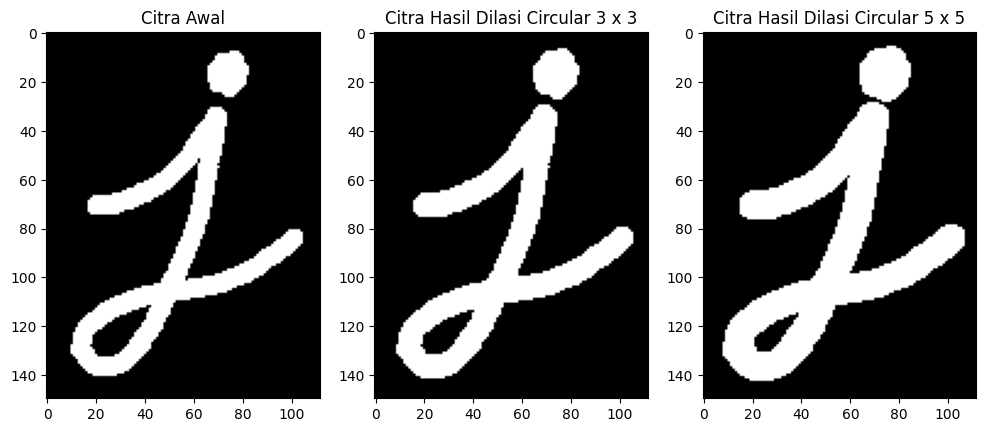

In [819]:
# Menginisialisasi SE circular 3 x 3
kernel_circle3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

# Menginisialisasi SE circular 5 x 5
kernel_circle5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi pada gambar dengan kernel circular 3 x 3
dilation_circle3 = cv.dilate(img_j, kernel_circle3)

# Melakukan dilasi pada gambar dengan kernel circular 5 x 5
dilation_circle5 = cv.dilate(img_j, kernel_circle5)

# Menampilkan gambar hasil dilasi dengan kernel circular 3 x 3 dan 5 x 5
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
axs[0].imshow(img_j, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilation_circle3, cmap='gray')
axs[1].set_title('Citra Hasil Dilasi Circular 3 x 3')
axs[2].imshow(dilation_circle5, cmap='gray')
axs[2].set_title('Citra Hasil Dilasi Circular 5 x 5')
plt.show()

> 11. Buatlah program implementasi operasi erosi dengan *Structuring Element* berbentuk **Rectangle 3 x 5 dan 5 x 7**, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

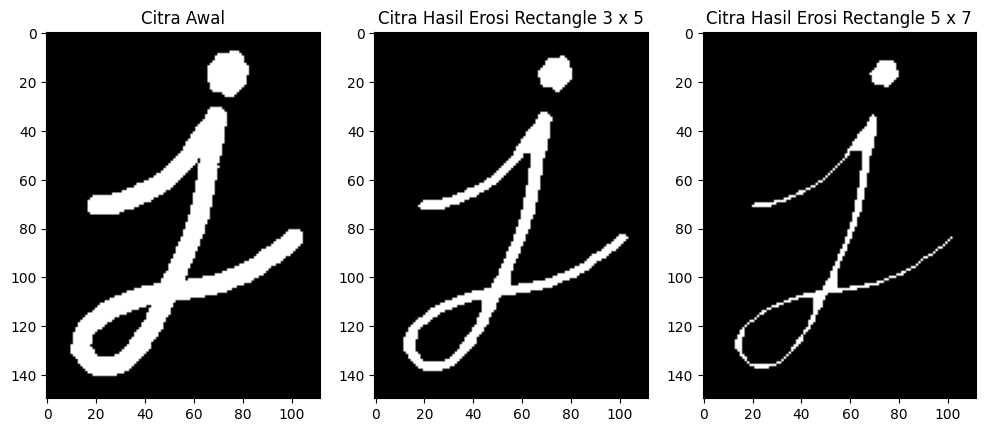

In [820]:
# Menginisialisasi SE rectangle 3 x 5
kernel_rect35 = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))

# Menginisialisasi SE rectangle 5 x 7
kernel_rect57 = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

# Melakukan erosi pada gambar dengan kernel rectangle 3 x 5
erosion_rect35 = cv.erode(img_j, kernel_rect35)

# Melakukan erosi pada gambar dengan kernel rectangle 5 x 7
erosion_rect57 = cv.erode(img_j, kernel_rect57)

# Menampilkan gambar hasil erosi dengan kernel rectangle 3 x 5 dan 5 x 7
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
axs[0].imshow(img_j, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erosion_rect35, cmap='gray')
axs[1].set_title('Citra Hasil Erosi Rectangle 3 x 5')
axs[2].imshow(erosion_rect57, cmap='gray')
axs[2].set_title('Citra Hasil Erosi Rectangle 5 x 7')
plt.show()

> 12. Buatlah program implementasi operasi erosi dengan *Structuring Element* berbentuk **Line Vertikal 3 dan 5**, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 


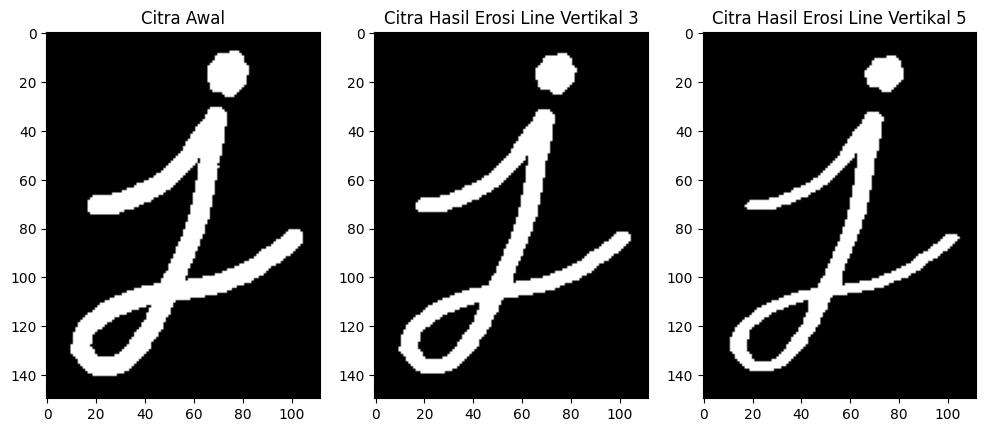

In [821]:
# # Menginisialisasi SE line vertikal 3
# kernel_linev3 = np.array([[0, 1, 0],
#                           [0, 1, 0],
#                           [0, 1, 0]], np.uint8)

# # Menginisialisasi SE line vertikal 5
# kernel_linev5 = np.array([[0, 0, 1, 0, 0],
#                           [0, 0, 1, 0, 0],
#                           [0, 0, 1, 0, 0],
#                           [0, 0, 1, 0, 0],
#                           [0, 0, 1, 0, 0]], np.uint8)

# Menginisialisasi SE line vertikal 3
kernel_linev3 = np.zeros((3, 1), dtype=np.uint8)
kernel_linev3[:, 0] = 1

# Menginisialisasi SE line vertikal 5
kernel_linev5 = np.zeros((5, 1), dtype=np.uint8)
kernel_linev5[:, 0] = 1

# Melakukan erosi pada gambar dengan kernel line vertikal 3
erosion_linev3 = cv.erode(img_j, kernel_linev3)

# Melakukan erosi pada gambar dengan kernel line vertikal 5
erosion_linev5 = cv.erode(img_j, kernel_linev5)

# Menampilkan gambar hasil erosi dengan kernel line vertikal 3 dan 5
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
axs[0].imshow(img_j, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(erosion_linev3, cmap='gray')
axs[1].set_title('Citra Hasil Erosi Line Vertikal 3')
axs[2].imshow(erosion_linev5, cmap='gray')
axs[2].set_title('Citra Hasil Erosi Line Vertikal 5')
plt.show()